# Logistic Regression
In this exercise, we'll continue working with the `titanic dataset` and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

import logistic_regression_util

from acquire import get_titanic_data
from prepare import prep_titanic

## Exercise 1
Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one?

In [2]:
df = get_titanic_data()
train, test = prep_titanic(df)
train = train[['fare','pclass','age','survived']]
test = test[['fare','pclass','age','survived']]
train.head()

,fare,pclass,age,survived
329,57.9792,1,16.0,1
749,7.7500,3,31.0,0
203,7.2250,3,45.5,0
421,7.7333,3,21.0,0
97,63.3583,1,23.0,1


In [3]:
train, validate = train_test_split(train, random_state=123, train_size=.8)
print('    test: %d rows x %d columns' % test.shape)
print('   train: %d rows x %d columns' % train.shape)
print('validate: %d rows x %d columns' % validate.shape)

    test: 179 rows x 4 columns
   train: 569 rows x 4 columns
validate: 143 rows x 4 columns


In [4]:
model1 = smf.logit('survived ~ fare + age + pclass', train).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.589488
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                  0.1206
Time:                        15:00:20   Log-Likelihood:                -335.42
converged:                       True   LL-Null:                       -381.44
Covariance Type:            nonrobust   LLR p-value:                 8.005e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7109      0.537      5.052      0.000       1.659       3.763
fare           0.0036      0.003      1.402      0.161      -0.001       0.009
age           -0.0370      0.008     -4.511      0.000      -0.053      -0.021
pclass        -0.9506      0.148     -6.410      0.000      -1.241      -0.660
==============================================================================
"""

In [5]:
probs = model1.predict(train)
actual = train.survived

In [6]:
validate.survived.mean()

0.3706293706293706

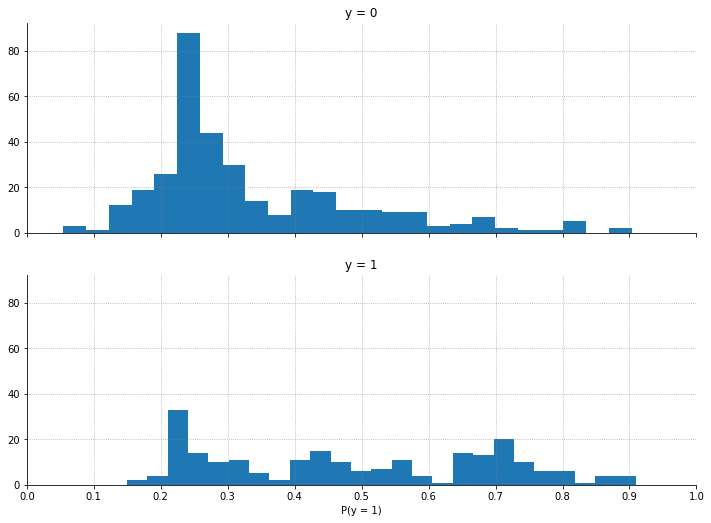

In [7]:
logistic_regression_util.plot_true_by_probs(actual, probs, subplots=True)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


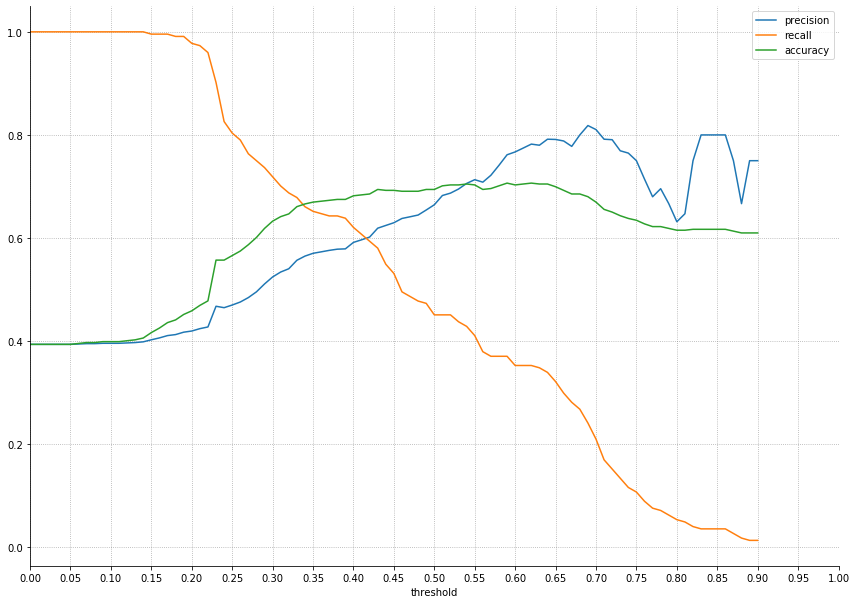

In [8]:
logistic_regression_util.plot_metrics_by_thresholds(actual, probs)

In [9]:
t = .55
probs = model1.predict(validate)
yhat = (probs > t).astype(int)
actual = validate.survived

accuracy_score(actual, yhat)

0.6713286713286714

## Exercise 2 
Include sex in your model as well. Note that you'll need to encode this feature before including it in a model.

In [10]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [11]:
train, test = prep_titanic(df)
train = train[['fare','pclass','age','sex','survived']]
test = test[['fare','pclass','age','sex','survived']]
train.head()

,fare,pclass,age,sex,survived
329,57.9792,1,16.0,female,1
749,7.7500,3,31.0,male,0
203,7.2250,3,45.5,male,0
421,7.7333,3,21.0,male,0
97,63.3583,1,23.0,male,1


In [12]:
encoder = LabelEncoder()
encoder.fit(train.sex)
train["sex_encoded"]= encoder.transform(train.sex)
test["sex_encoded"] = encoder.transform(test.sex)
train.head()

,fare,pclass,age,sex,survived,sex_encoded
329,57.9792,1,16.0,female,1,0
749,7.7500,3,31.0,male,0,1
203,7.2250,3,45.5,male,0,1
421,7.7333,3,21.0,male,0,1
97,63.3583,1,23.0,male,1,1


In [13]:
train, validate = train_test_split(train, random_state=123, train_size=.8)
print('    test: %d rows x %d columns' % test.shape)
print('   train: %d rows x %d columns' % train.shape)
print('validate: %d rows x %d columns' % validate.shape)


    test: 179 rows x 6 columns
   train: 569 rows x 6 columns
validate: 143 rows x 6 columns


In [14]:
model2 = smf.logit('survived ~ fare + age + pclass + sex_encoded', train).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.463866
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  569
Model:                          Logit   Df Residuals:                      564
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                  0.3080
Time:                        15:00:21   Log-Likelihood:                -263.94
converged:                       True   LL-Null:                       -381.44
Covariance Type:            nonrobust   LLR p-value:                 1.110e-49
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.6106      0.645      7.149      0.000       3.346       5.875
fare        -5.165e-05      0.002     -0.021      0.984      -0.005       0.005
age            -0.0300      0.009     -3.190      0.001      -0.048      -0.012
pclass         -1.1480      0.169     -6.794      0.000      -1.479      -0.817
sex_encoded    -2.5230      0.232    -10.859      0.000      -2.978      -2.068
===============================================================================
"""

In [15]:
probs = model2.predict(train)
actual = train.survived

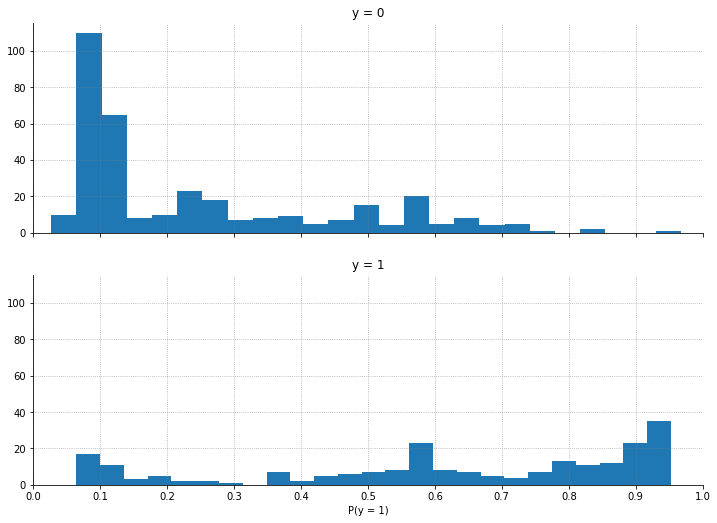

In [16]:
logistic_regression_util.plot_true_by_probs(actual, probs, subplots=True)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


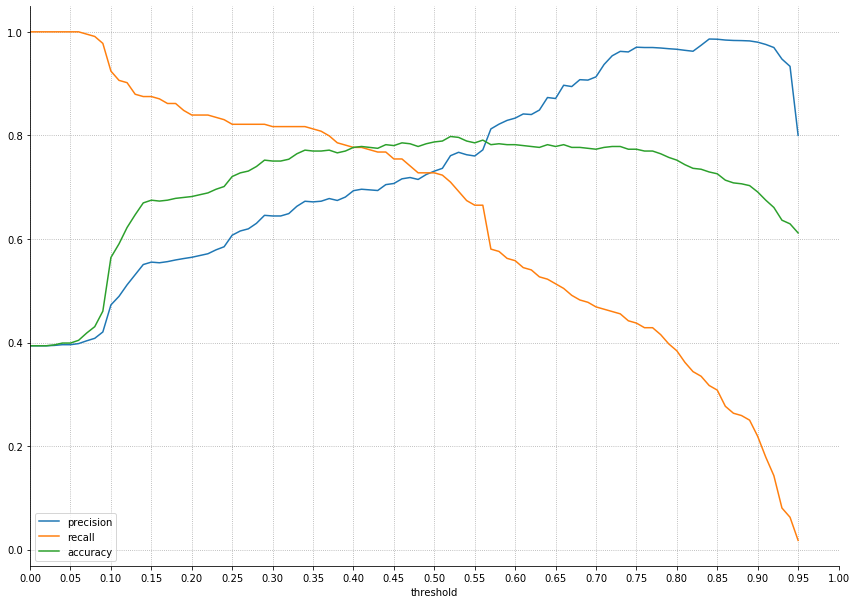

In [17]:
logistic_regression_util.plot_metrics_by_thresholds(actual, probs)

In [18]:
t = .55
probs = model2.predict(validate)
yhat = (probs > t).astype(int)
actual = validate.survived

accuracy_score(actual, yhat)

0.8041958041958042

## Exercise 3
Try out other combinations of features and models.

In [19]:
#split
train, test = prep_titanic(df)
train = train[['fare','pclass','age','sex','survived','alone']]
test = test[['fare','pclass','age','sex','survived','alone']]
#incoding
encoder = LabelEncoder()
encoder.fit(train.sex)
train["sex_encoded"]= encoder.transform(train.sex)
test["sex_encoded"] = encoder.transform(test.sex)
#
train, validate = train_test_split(train, random_state=123, train_size=.8)
print('    test: %d rows x %d columns' % test.shape)
print('   train: %d rows x %d columns' % train.shape)
print('validate: %d rows x %d columns' % validate.shape)

    test: 179 rows x 7 columns
   train: 569 rows x 7 columns
validate: 143 rows x 7 columns


In [20]:
#create model
model3 = smf.logit('survived ~ fare + age + pclass + sex_encoded + alone', train).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.463733
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                  0.3082
Time:                        15:00:22   Log-Likelihood:                -263.86
converged:                       True   LL-Null:                       -381.44
Covariance Type:            nonrobust   LLR p-value:                 8.438e-49
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.6436      0.651      7.134      0.000       3.368       5.919
fare           -0.0003      0.003     -0.104      0.917      -0.005       0.005
age            -0.0295      0.009     -3.113      0.002      -0.048      -0.011
pclass         -1.1485      0.169     -6.795      0.000      -1.480      -0.817
sex_encoded    -2.5012      0.239    -10.487      0.000      -2.969      -2.034
alone          -0.0911      0.234     -0.390      0.697      -0.549       0.367
===============================================================================
"""

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


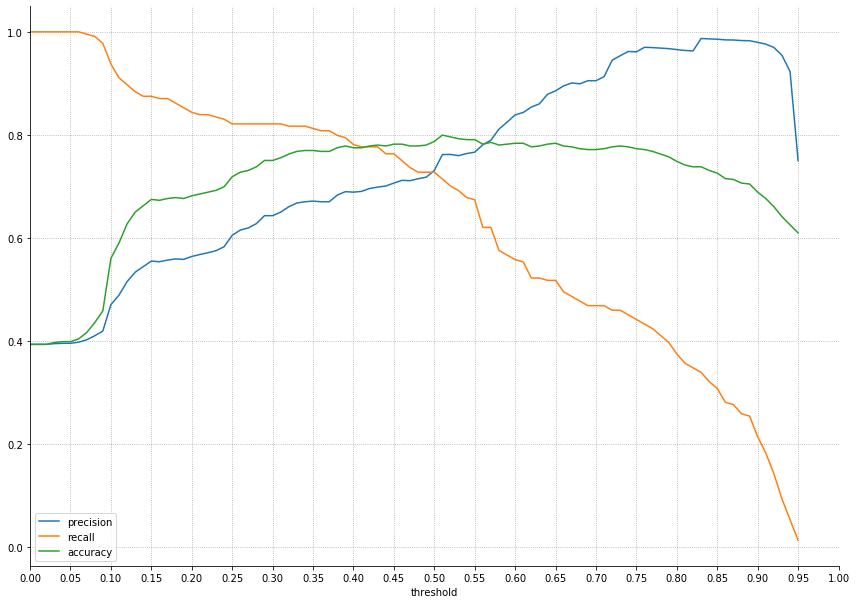

In [21]:
probs = model3.predict(train)
actual = train.survived
logistic_regression_util.plot_metrics_by_thresholds(actual, probs)

In [22]:
#model apply to validate data
t = .55
probs = model3.predict(validate)
yhat = (probs > t).astype(int)
actual = validate.survived

accuracy_score(actual, yhat)

0.8041958041958042

## Exercise 4
Choose you best model and evaluate it on the test dataset. Is it overfit?

# Decision Tree

## Exercise 1 
Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [24]:
X = train.drop(['survived','sex'],axis=1)
y = train[['survived']]

In [25]:
X.head()

,fare,pclass,age,alone,sex_encoded
535,26.2500,2,7.000000,0,0
573,7.7500,3,29.832908,1,0
736,34.3750,3,48.000000,0,0
713,9.4833,3,29.000000,1,1
528,7.9250,3,39.000000,1,1


In [26]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)
clf.fit(X, y)
y_pred = clf.predict(X)

## Exercise 2
Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [27]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X, y)))

Accuracy of Decision Tree classifier on training set: 0.81


In [28]:
labels = sorted(y.survived.unique())

pd.DataFrame(confusion_matrix(y, y_pred), index=labels, columns=labels)

,0,1
0,296,49
1,58,166


In [29]:
pd.DataFrame(classification_report(y, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.836158,0.772093,0.811951,0.804126,0.810937
recall,0.857971,0.741071,0.811951,0.799521,0.811951
f1-score,0.846924,0.756264,0.811951,0.801594,0.811234
support,345.000000,224.000000,0.811951,569.000000,569.000000


## Exercise 3
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [30]:
pd.crosstab(y.survived, y_pred, normalize=True)

col_0,0,1
survived,,
0,0.520211,0.086116
1,0.101933,0.291740


## Exercise 4
Run through steps 2-4 using entropy as your measure of impurity.

In [31]:
X = train.drop(['survived','sex'],axis=1)
y = train[['survived']]
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)
clf.fit(X, y)
y_pred = clf.predict(X)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X, y)))

Accuracy of Decision Tree classifier on training set: 0.80


In [32]:
pd.DataFrame(classification_report(y, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.807487,0.779487,0.797891,0.793487,0.796464
recall,0.875362,0.678571,0.797891,0.776967,0.797891
f1-score,0.840056,0.725537,0.797891,0.782796,0.794973
support,345.000000,224.000000,0.797891,569.000000,569.000000


In [33]:
pd.crosstab(y.survived, y_pred, normalize=True)

col_0,0,1
survived,,
0,0.530756,0.075571
1,0.126538,0.267135


## Exercise 5
Which performs better on your in-sample data?

Entropy performs better.